# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import datetime as dt

# Import the OpenWeatherMap API key
from api_keys import weather_api_key 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [23]:
# Constants 
NUM_POINTS = 1500    # DEBUG 1500 

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city *********
    city_url = base_url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = dt.datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | goure
Processing Record 2 of Set 1 | safwah
City not found. Skipping...
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | yerbogachen
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | jalu
Processing Record 8 of Set 1 | mogadishu
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | berlevag
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | bontang
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | chernyshevskiy
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | snasa
Processing Record 22 of Se

In [26]:
print(city_weather)

{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 42.82, 'feels_like': 37.33, 'temp_min': 40.66, 'temp_max': 43.61, 'pressure': 1031, 'humidity': 88, 'sea_level': 1031, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 9.53, 'deg': 256, 'gust': 18.97}, 'clouds': {'all': 98}, 'dt': 1675901268, 'sys': {'type': 2, 'id': 2005965, 'country': 'GB', 'sunrise': 1675928487, 'sunset': 1675963248}, 'timezone': 0, 'id': 2641434, 'name': 'Northam', 'cod': 200}


In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [28]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,goure,13.9835,10.2704,65.35,19,33,10.11,NE,2023-02-09 00:07:45
1,punta arenas,-53.1500,-70.9167,55.51,50,40,19.57,CL,2023-02-09 00:07:46
2,walvis bay,-22.9575,14.5053,65.08,90,5,8.14,NA,2023-02-09 00:07:46
3,yerbogachen,61.2767,108.0108,-6.12,99,100,4.88,RU,2023-02-09 00:07:47
4,ushuaia,-54.8000,-68.3000,51.46,93,100,5.75,AR,2023-02-09 00:07:47


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data:cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data:cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,goure,13.9835,10.2704,65.35,19,33,10.11,NE,2023-02-09 00:07:45
1,punta arenas,-53.1500,-70.9167,55.51,50,40,19.57,CL,2023-02-09 00:07:46
2,walvis bay,-22.9575,14.5053,65.08,90,5,8.14,NaN,2023-02-09 00:07:46
3,yerbogachen,61.2767,108.0108,-6.12,99,100,4.88,RU,2023-02-09 00:07:47
4,ushuaia,-54.8000,-68.3000,51.46,93,100,5.75,AR,2023-02-09 00:07:47


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [31]:

# Build scatter plot for latitude vs. temperature
x = city_data["Lat"]
y = city_data["Max Temp"]
plt.scatter(x,y)

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Max Latitude vs. Temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

TypeError: list indices must be integers or slices, not str

#### Latitude Vs. Humidity

In [ ]:
# Build the scatter plots for latitude vs. humidity

x = city_data["Lat"]
y = city_data["Humidity"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

TypeError: 'list' object is not callable

#### Latitude Vs. Cloudiness

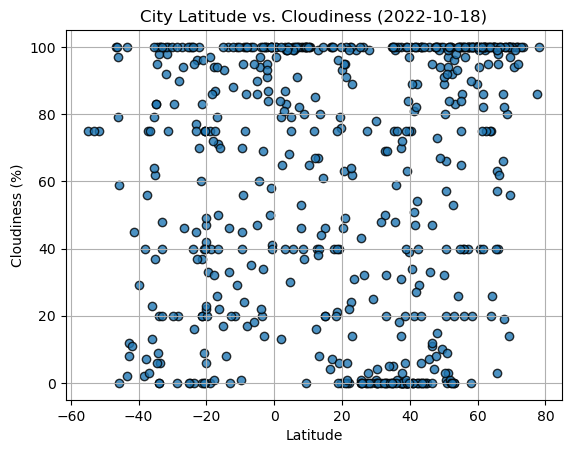

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.title("City Latitute vs. Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

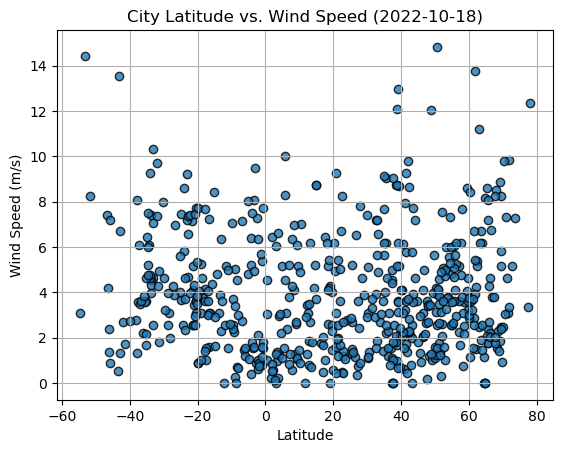

In [ ]:
# Build the scatter plots for latitude vs. wind speed

x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x,y)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots ****
def linear_regression_plot(data, x_col, y_col):
    model = LinearRegression()
    x = data[x_col].values.reshape(-1, 1)
    y = data[y_col].values.reshape(-1, 1)
    model.fit(x, y)
    y_pred = model.predict(x)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mae sai,20.4335,99.8762,55.42,37,0,2.68,TH,2023-02-08 22:59:54
4,anadyr,64.7500,177.4833,-30.50,68,0,11.18,RU,2023-02-08 22:59:54
6,muli,2.9167,73.5667,81.01,71,91,7.09,MV,2023-02-08 22:59:55
7,clyde river,70.4692,-68.5914,-28.97,68,0,5.75,CA,2023-02-08 22:59:56
8,qatana,33.4354,36.0815,30.63,73,2,7.27,SY,2023-02-08 22:59:56


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,constitucion,-35.3333,-72.4167,66.16,67,18,13.96,CL,2023-02-08 22:59:53
1,busselton,-33.6500,115.3333,60.66,83,2,12.12,AU,2023-02-08 22:59:54
2,ushuaia,-54.8000,-68.3000,58.62,72,100,2.30,AR,2023-02-08 22:59:54
5,atuona,-9.8000,-139.0333,78.89,81,17,18.88,PF,2023-02-08 22:59:55
9,bredasdorp,-34.5322,20.0403,66.61,81,3,13.89,ZA,2023-02-08 22:59:56


###  Temperature vs. Latitude Linear Regression Plot

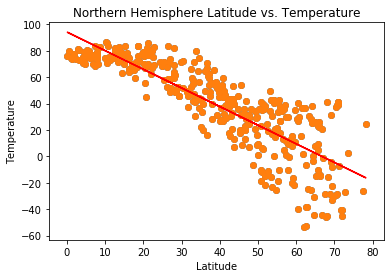

In [ ]:
# Linear regression on Northern Hemisphere

# Scatter plot variables
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere Latitude vs. Temperature")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()


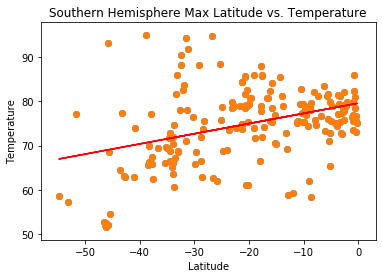

In [ ]:
# Linear regression on Southern Hemisphere
# Scatter plot variables
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere Max Latitude vs. Temperature")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

**Discussion about the linear relationships: Not surprisingly, temperature increases as we approach the equator. However, temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. This may be due to the Earth's tilt in the axis known as obliquity.

### Humidity vs. Latitude Linear Regression Plot

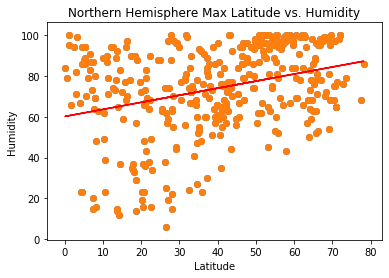

In [ ]:
# Northern Hemisphere
# Scatter plot variables
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Max Latitude vs. Humidity")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

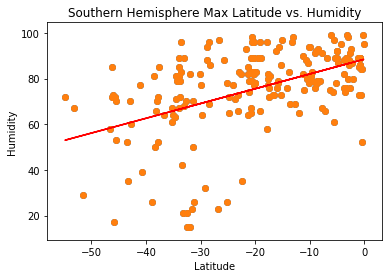

In [ ]:
# Southern Hemisphere
# Scatter plot variables
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Max Latitude vs. Humidity")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

**Discussion about the linear relationship:** There seems to be no direct correlation to humidity and latitude, most likely because humidity is not affected by the curve of the Earth or the tilt of its axis in the same way temperature is. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


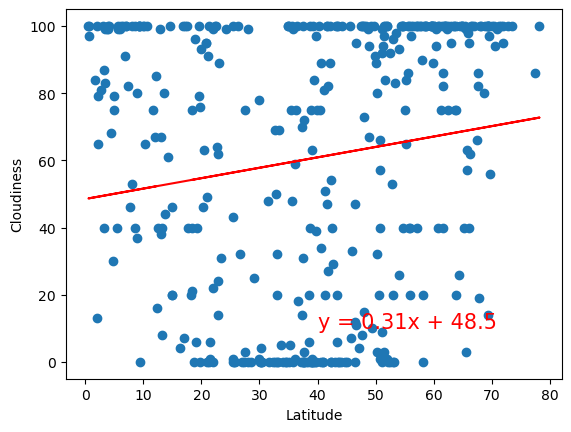

In [ ]:
# Northern Hemisphere
# Scatter plot variables
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere Max Latitude vs. Cloudiness")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

The r-value is: 0.02056735429994368


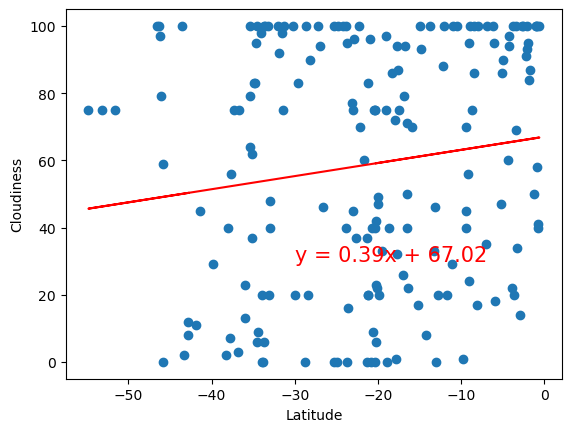

In [ ]:
# Southern Hemisphere
# Scatter plot variables
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

**Discussion about the linear relationship:** Much like humidity, cloudiness does not seem to have any correlation to latitude. However based on the visualizations, it does appear that cloudiness and humidity seem to show variety at similar latitudes. This is something that should be examined more. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


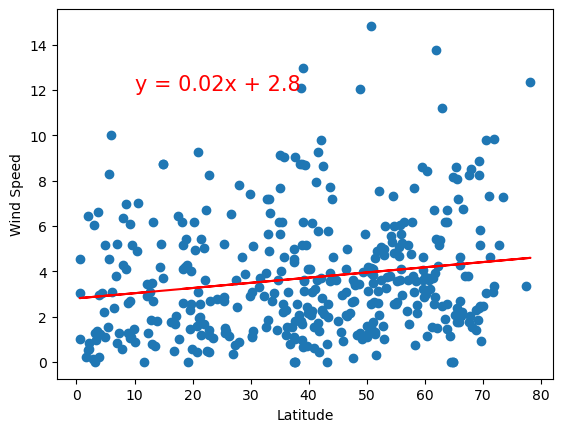

In [ ]:
# Northern Hemisphere
# Scatter plot variables
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere Max Latitude vs. Wind Speed")

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

The r-value is: 0.062239040700515696


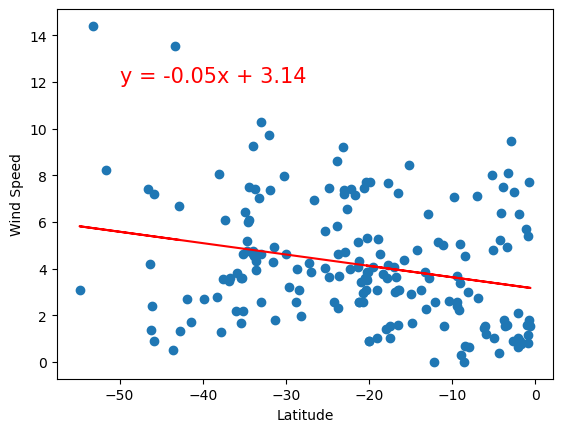

In [ ]:
# Southern Hemisphere
# Scatter plot variables
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Scatter plot
plt.scatter(x,y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere Max Latitude vs. Wind Speed")

#Calculate linear regressions
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data:cities")

# Show plot
plt.show()

**Discussion about the linear relationship:** While there does seem to be a mild correlation between wind speed and latitude, there is not enough specific information to come to a conclusion either way. 